# 现实多因子房价预测

In [1]:
#数据加载
import pandas as pd
import numpy as np
data = pd.read_csv('task2_data.csv')
data.head(10)

,面积,人均收入,平均房龄,价格
0,188.581619,79245.63626,4.901877,1.096850e+06
1,164.161571,78936.74809,4.688919,1.455588e+06
2,232.949602,63236.99563,4.878289,1.051696e+06
3,150.608655,65122.34212,3.577503,1.373964e+06
4,153.862555,63628.64511,5.877775,6.231222e+05
5,165.454380,78251.30721,6.317630,9.624172e+05
6,181.772344,63814.85840,5.296689,1.540739e+06
7,172.055050,75195.11765,3.683635,1.442917e+06
8,169.151184,63762.73947,6.168691,8.577471e+05
9,217.052339,86801.37667,6.016151,1.543245e+06


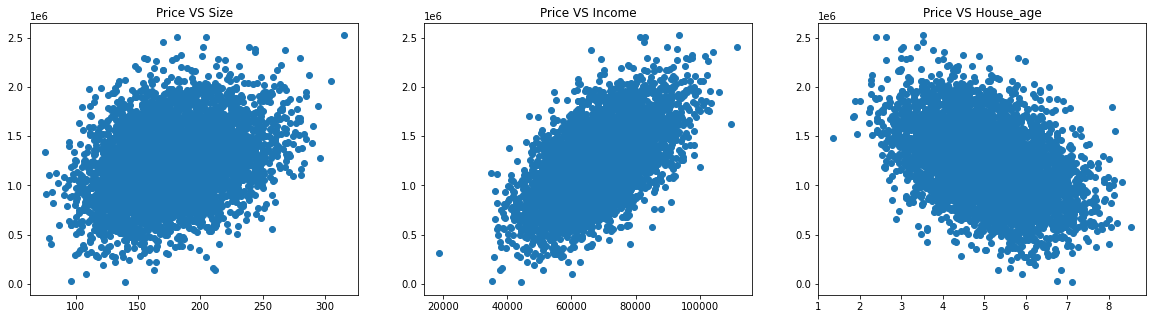

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,5))
fig1 = plt.subplot(131)
plt.scatter(data.loc[:,'面积'],data.loc[:,'价格'])
plt.title('Price VS Size')

fig2 = plt.subplot(132)
plt.scatter(data.loc[:,'人均收入'],data.loc[:,'价格'])
plt.title('Price VS Income')

fig3 = plt.subplot(133)
plt.scatter(data.loc[:,'平均房龄'],data.loc[:,'价格'])
plt.title('Price VS House_age')
plt.show()

In [3]:
#X y赋值
X = data.loc[:,'面积']
y = data.loc[:,'价格']
print(X,y)

0       188.581619
1       164.161571
2       232.949602
3       150.608655
4       153.862555
           ...    
4995    173.460517
4996    153.824196
4997    140.253298
4998    177.595700
4999    155.117770
Name: 面积, Length: 5000, dtype: float64 0       1.096850e+06
1       1.455588e+06
2       1.051696e+06
3       1.373964e+06
4       6.231222e+05
            ...     
4995    1.046669e+06
4996    1.584436e+06
4997    9.390003e+05
4998    1.212272e+06
4999    1.259594e+06
Name: 价格, Length: 5000, dtype: float64


In [4]:
#数据预处理
X = np.array(X)
y = np.array(y)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape,y.shape)

(5000, 1) (5000, 1)


In [5]:
#模型的建立与训练
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [6]:
#模型预测
y_predict = model.predict(X)
print(y_predict)

[[1273463.80967472]
 [1192500.07431933]
 [1420564.16140447]
 ...
 [1113233.11006996]
 [1237040.41730573]
 [1162515.70057855]]


In [7]:
from sklearn.metrics import mean_squared_error,r2_score
MSE = mean_squared_error(y,y_predict)
R2 = r2_score(y,y_predict)
print(MSE)
print(R2)

116859388203.27335
0.10766339222843158


Text(0.5, 1.0, 'Price VS Size')

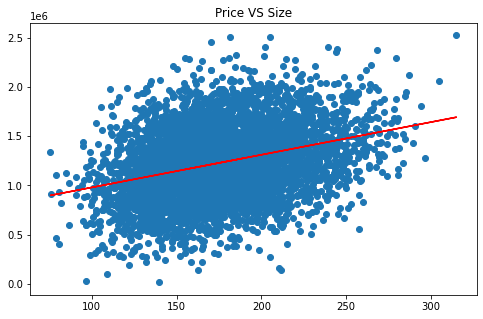

In [8]:
fig2 = plt.figure(figsize=(8,5))
plt.scatter(data.loc[:,'面积'],data.loc[:,'价格'])
plt.plot(X,y_predict,'r')
plt.title('Price VS Size')

In [9]:
#X y再次赋值
X = data.drop(['价格'],axis=1)
y = data.loc[:,'价格']
X.head()

,面积,人均收入,平均房龄
0,188.581619,79245.63626,4.901877
1,164.161571,78936.74809,4.688919
2,232.949602,63236.99563,4.878289
3,150.608655,65122.34212,3.577503
4,153.862555,63628.64511,5.877775


In [10]:
print(X.shape)

(5000, 3)


In [11]:
#建立多因子回归模型 并且训练
model_multi = LinearRegression()
model_multi.fit(X,y)

LinearRegression()

In [12]:
#多因子模型的预测
y_predict_multi = model_multi.predict(X)
print(y_predict_multi)

[1463868.24688829 1445981.85185019 1253388.6205439  ... 1285670.68139457
 1243839.71867445 1116875.92416746]


In [13]:
MSE_multi = mean_squared_error(y,y_predict_multi)
R2_multi = r2_score(y,y_predict_multi)
print(MSE_multi)
print(R2_multi)

58264450329.883
0.555093495178965


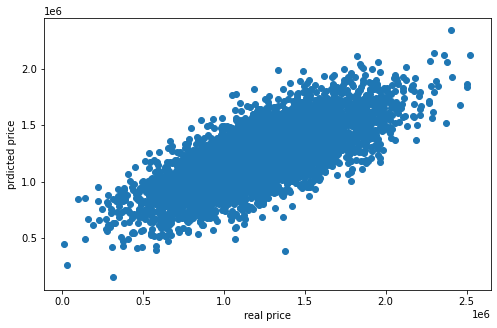

In [14]:
#可视化预测结果
fig3 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_multi)
plt.xlabel('real price')
plt.ylabel('prdicted price')

plt.show()

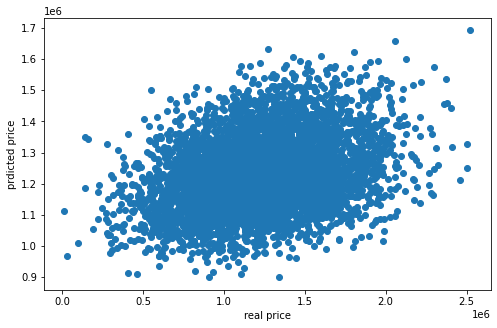

In [15]:
#可视化预测结果
fig4 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict)
plt.xlabel('real price')
plt.ylabel('prdicted price')

plt.show()

In [16]:
#预测面积=160, 人均收入=70000, 平均房龄=5的合理房价
X_test = np.array([[160,70000,5]])
y_test_predict = model_multi.predict(X_test)
print(y_test_predict)

[1235099.47156076]


![materials](materials2.png)